# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2025-01-30 07:53:44.468954: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738223624.512661    4081 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738223624.525257    4081 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "../datasets/Plant_Disease_Dataset/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


I0000 00:00:1736244922.128763   11795 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3586 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "../datasets/Plant_Disease_Dataset/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/home/sam5io/sam_engineerings/AgroDiagnoseAI/.AgroDiagnoseAI_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


I0000 00:00:1736245128.602995   11966 service.cc:148] XLA service 0x7fb930016350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736245128.603363   11966 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
I0000 00:00:1736245129.051667   11966 cuda_dnn.cc:529] Loaded cuDNN version 90300


   2/2197 ━━━━━━━━━━━━━━━━━━━━ 2:59 82ms/step - accuracy: 0.0625 - loss: 5.2881  

I0000 00:00:1736245137.267906   11966 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 118s 49ms/step - accuracy: 0.4027 - loss: 2.1270 - val_accuracy: 0.8550 - val_loss: 0.4665
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 96s 44ms/step - accuracy: 0.8358 - loss: 0.5249 - val_accuracy: 0.9011 - val_loss: 0.3187
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 91s 42ms/step - accuracy: 0.9023 - loss: 0.2978 - val_accuracy: 0.9253 - val_loss: 0.2372
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 91s 42ms/step - accuracy: 0.9356 - loss: 0.1959 - val_accuracy: 0.9468 - val_loss: 0.1715
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 91s 42ms/step - accuracy: 0.9528 - loss: 0.1468 - val_accuracy: 0.9463 - val_loss: 0.1676
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 91s 42ms/step - accuracy: 0.9609 - loss: 0.1161 - val_accuracy: 0.9597 - val_loss: 0.1237
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 91s 41ms/step - accuracy: 0.9710 - loss: 0.0918 - val_accuracy: 0.9640 - val_loss: 0.1149
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 92s 42ms/step - accuracy: 0.9747 - loss: 0.0

## Evaluating Model

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.9905 - loss: 0.0299
Training accuracy: 0.9912226796150208


In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9691 - loss: 0.1064
Validation accuracy: 0.9662531018257141


### Saving Model

In [21]:
cnn.save('../models/trained_plant_disease_model.keras')

In [22]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6030585169792175,
  0.8591222763061523,
  0.9119709730148315,
  0.9398961663246155,
  0.9549754858016968,
  0.9636958241462708,
  0.9708371758460999,
  0.9756028056144714,
  0.9794579744338989,
  0.9822604656219482],
 'loss': [1.3509199619293213,
  0.4442940950393677,
  0.2669854164123535,
  0.18245269358158112,
  0.1372624635696411,
  0.10852246731519699,
  0.09055999666452408,
  0.07426276057958603,
  0.06262019276618958,
  0.056429922580718994],
 'val_accuracy': [0.8549965620040894,
  0.901149570941925,
  0.9253357648849487,
  0.946790337562561,
  0.9463350772857666,
  0.9597086310386658,
  0.9639768004417419,
  0.9628955125808716,
  0.9554973840713501,
  0.9662531018257141],
 'val_loss': [0.46647730469703674,
  0.3186780512332916,
  0.23723094165325165,
  0.17146021127700806,
  0.1675831824541092,
  0.12373869866132736,
  0.1149078831076622,
  0.12252967059612274,
  0.15351910889148712,
  0.11664874106645584]}

In [23]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

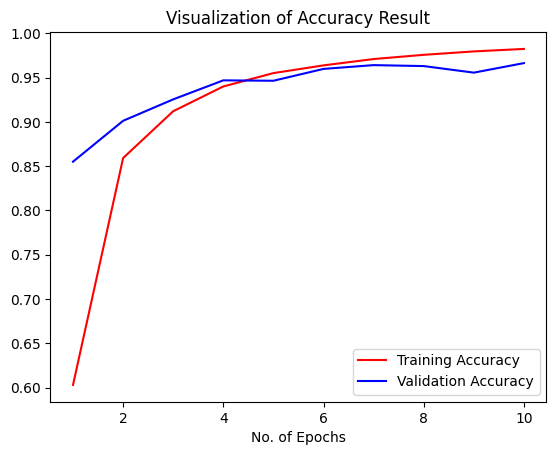

In [25]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

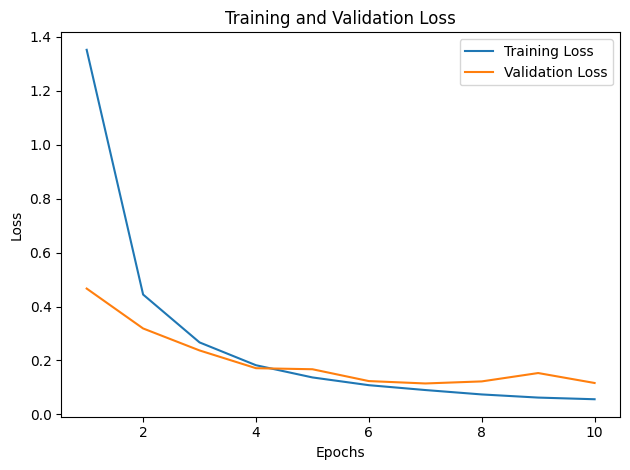

In [5]:
hist_json = {
    "accuracy": [
        0.6030585169792175,
        0.8591222763061523,
        0.9119709730148315,
        0.9398961663246155,
        0.9549754858016968,
        0.9636958241462708,
        0.9708371758460999,
        0.9756028056144714,
        0.9794579744338989,
        0.9822604656219482,
    ],
    "loss": [
        1.3509199619293213,
        0.4442940950393677,
        0.2669854164123535,
        0.18245269358158112,
        0.1372624635696411,
        0.10852246731519699,
        0.09055999666452408,
        0.07426276057958603,
        0.06262019276618958,
        0.056429922580718994,
    ],
    "val_accuracy": [
        0.8549965620040894,
        0.901149570941925,
        0.9253357648849487,
        0.946790337562561,
        0.9463350772857666,
        0.9597086310386658,
        0.9639768004417419,
        0.9628955125808716,
        0.9554973840713501,
        0.9662531018257141,
    ],
    "val_loss": [
        0.46647730469703674,
        0.3186780512332916,
        0.23723094165325165,
        0.17146021127700806,
        0.1675831824541092,
        0.12373869866132736,
        0.1149078831076622,
        0.12252967059612274,
        0.15351910889148712,
        0.11664874106645584,
    ],
}

epochs = range(1, len(hist_json["loss"]) + 1)

# Plot loss
# plt.subplot(1, 2, 2)
plt.plot(epochs, hist_json["loss"], label="Training Loss")
plt.plot(epochs, hist_json["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

## Some other metrics for model evaluation

In [26]:
class_name = validation_set.class_names

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '../datasets/Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [29]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step


In [30]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [31]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [32]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [2]:
# Create a DataFrame for comparison
import pandas as pd
comparison_df = pd.DataFrame(
    {
        "True Labels": Y_true[:50],  # Take the first 50 rows of true labels
        "Predicted Labels": y_pred[:50],  # Take the first 50 rows of predicted labels
    }
)

# Display the table
print(comparison_df)

NameError: name 'Y_true' is not defined

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [34]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.98      0.96       504
                                 Apple___Black_rot       0.98      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.94      0.98      0.96       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.89      0.93       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.98      0.

### Confusion Matrix Visualization

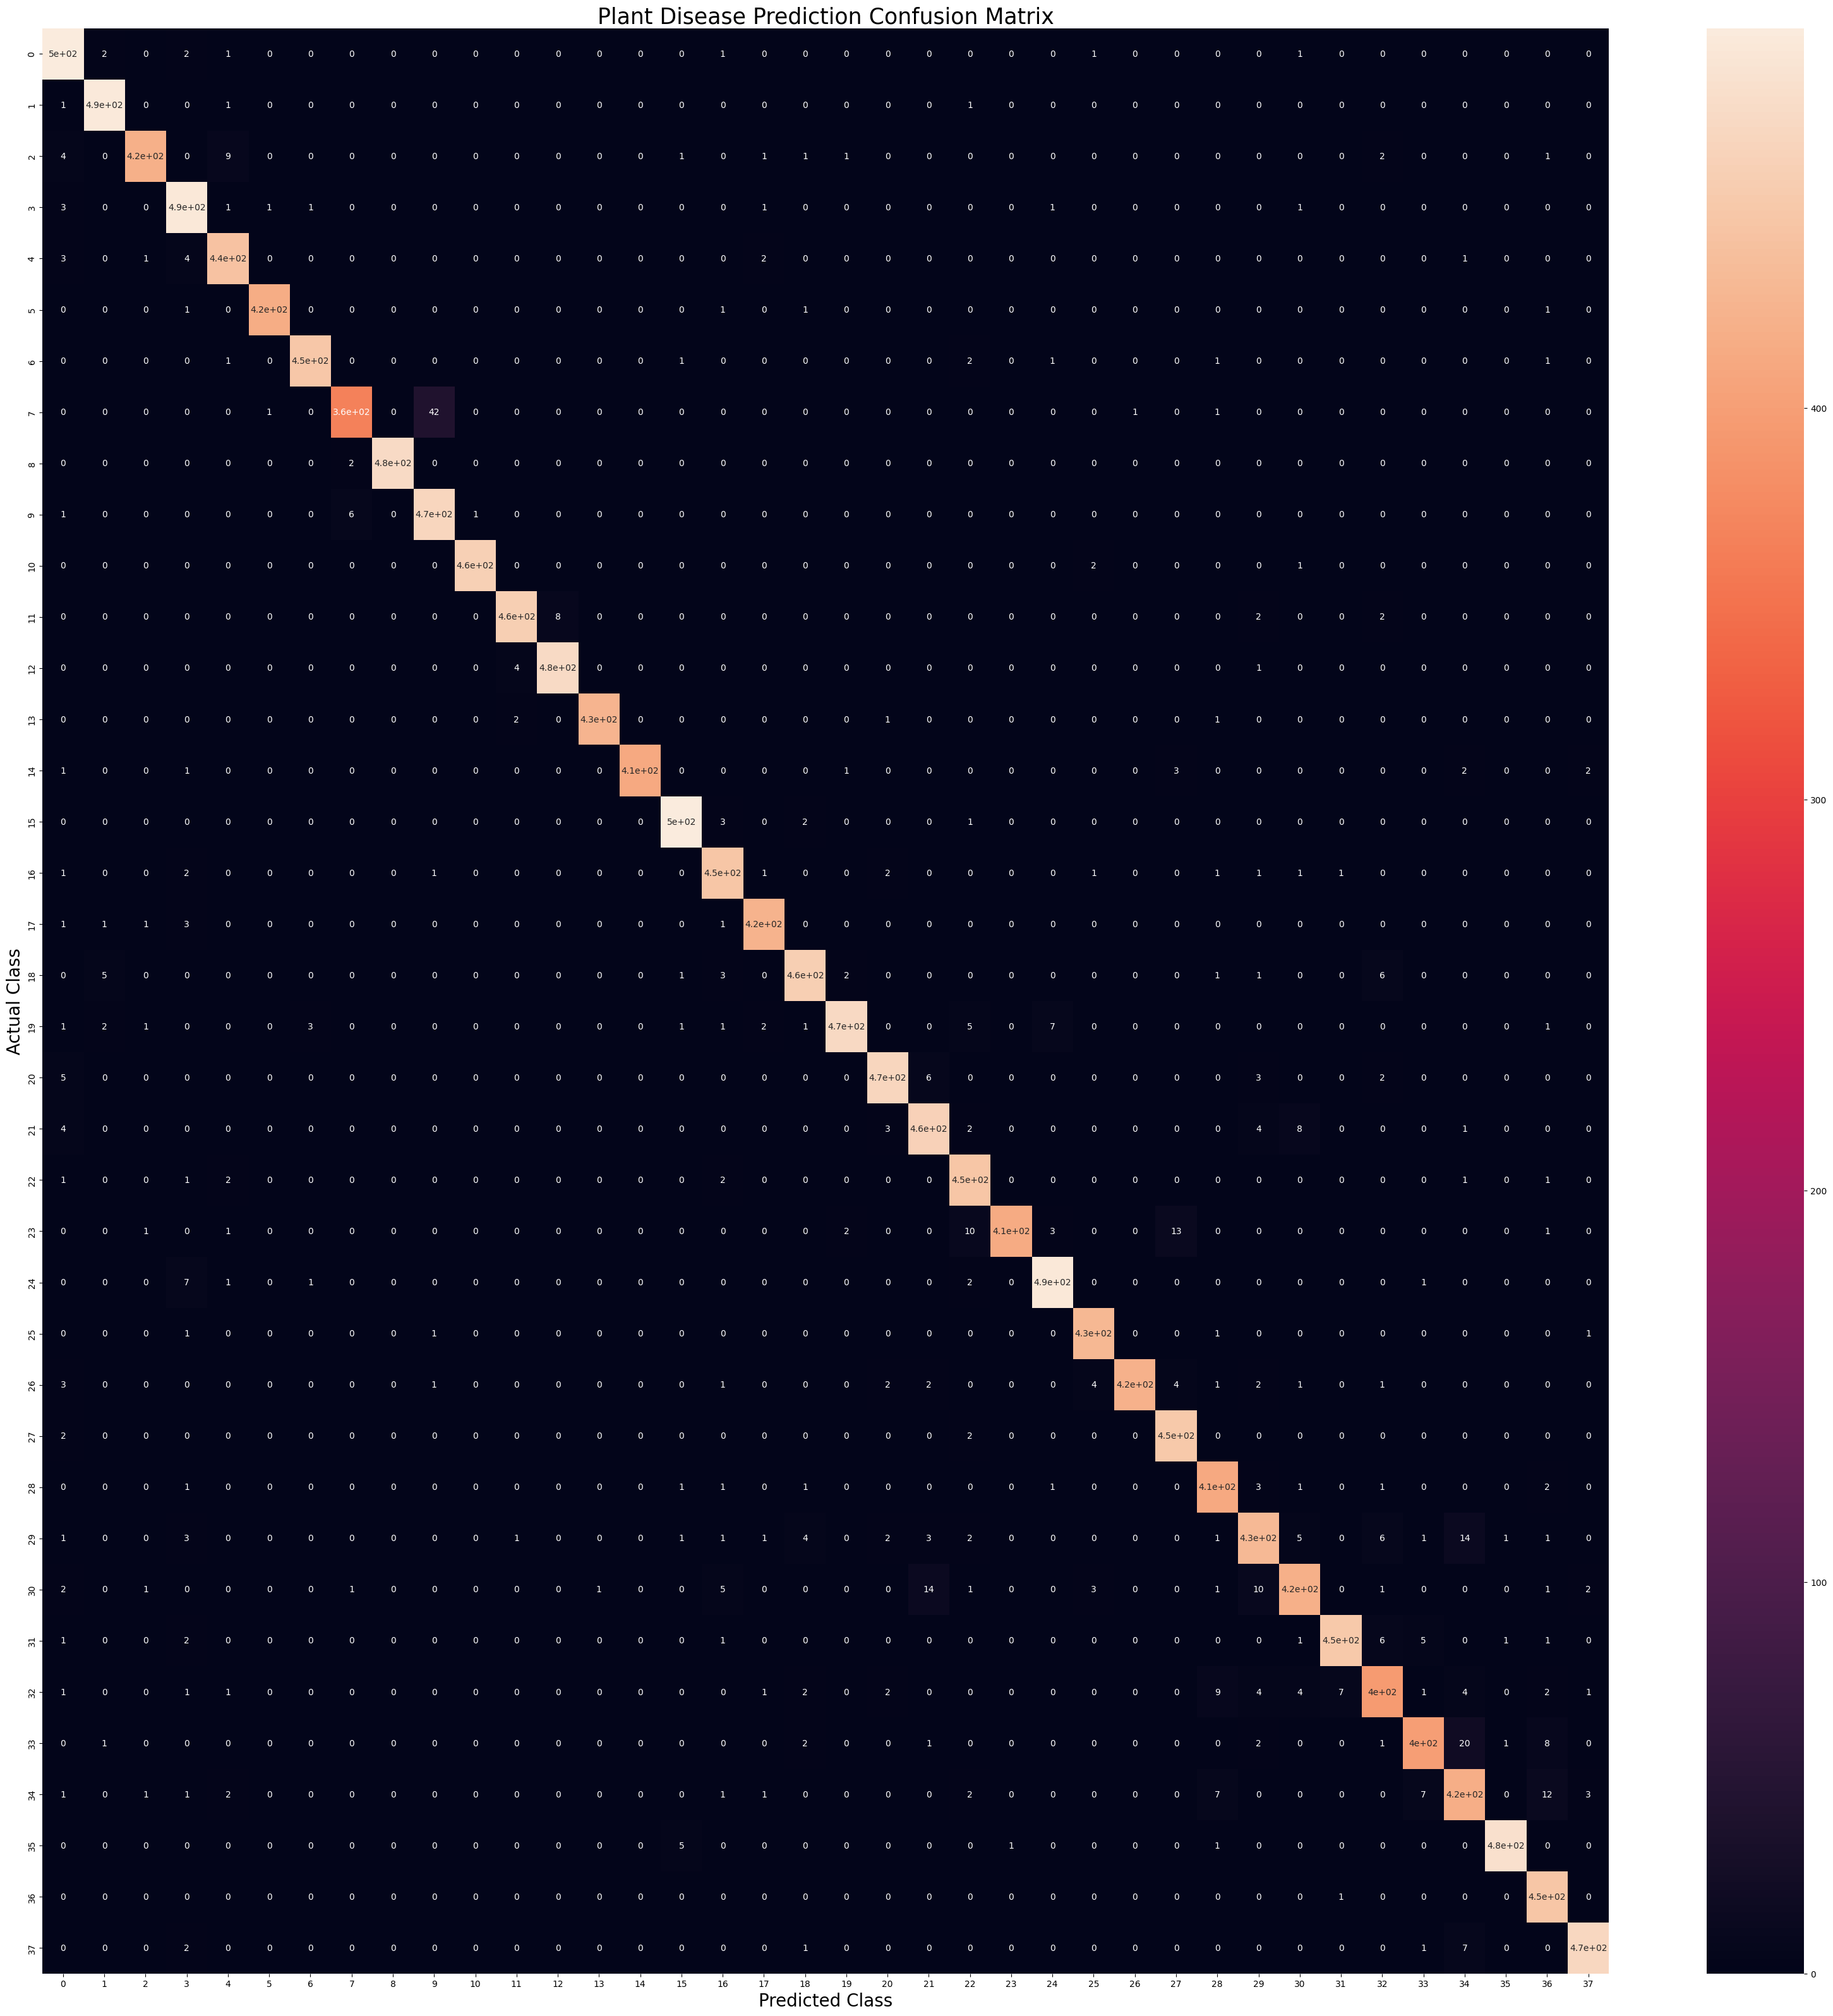

In [35]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()